## Выявление закономерностей, определяющих успешность игр.

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### 1. Подготовка данных

* Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом.   
Поясним, как обработать это значение.

In [2]:
# path = '/datasets/games.csv'

path = r'D:\Литература\Кругозор\Хороший программист\ЯндексП\Проекты\games.csv'

In [3]:
df = pd.read_csv(path)
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

**Заменим названия столбцов (приведем к нижнему регистру)**

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
def low_register(column_name):
    return column_name.lower()

In [6]:
df.rename(columns=low_register, inplace=True)
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [7]:
df.user_score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.6       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Вывод:
    
* Аббревиатура tbd означают to be announced. Перевод простой — «будет объявлено дополнительно».  
Используется, если какая-то информация еще не определена или решение по вопросу не принято.  
* Заменим на NaN

In [8]:
df.user_score = df.user_score.replace('tbd', np.nan)

**Преобразуем данные в нужные типы. Опишием, в каких столбцах заменили тип данных и почему**

In [9]:
df.shape

(16715, 11)

In [10]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
# конвертируем строковый тип данных поля user_score в числовой с плавающей точкой

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [13]:
# конвертируем числовой тип данных поля year_of_release в дату

df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

In [14]:
df.dtypes

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                     object
dtype: object

In [15]:
df.tail()

name platform year_of_release       genre  \
16710  Samurai Warriors: Sanada Maru      PS3      2016-01-01      Action   
16711               LMA Manager 2007     X360      2006-01-01      Sports   
16712        Haitaka no Psychedelica      PSV      2016-01-01   Adventure   
16713               Spirits & Spells      GBA      2003-01-01    Platform   
16714            Winning Post 8 2016      PSV      2016-01-01  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16710      0.00      0.00      0.01          0.0           NaN         NaN   
16711      0.00      0.01      0.00          0.0           NaN         NaN   
16712      0.00      0.00      0.01          0.0           NaN         NaN   
16713      0.01      0.00      0.00          0.0           NaN         NaN   
16714      0.00      0.00      0.01          0.0           NaN         NaN   

      rating  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN

Изменили:
* тип данных в столбце _user_score_ на числовой (был строкой)
* тпи данных в столбце _year_of_release_ на дату (был числовой с плавющей точкой)

**Обработайте пропуски при необходимости**:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;

In [16]:
# проверим на пропуски в колонках весь датафрейм

df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

_Посмотрим на строки с пропущенными значениями в интересующих нас колонках_

In [17]:
# df.loc[df['name'].isna()]
# или

df[df['name'].isnull()]

name platform year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN      1993-01-01   NaN      1.78      0.53      0.00   
14244  NaN      GEN      1993-01-01   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN

In [18]:
# нет ни названия игры ни жанра и всего-лишь два значения, удаление которых вряд ли
# повлияет на изменение картины в целом

df.dropna(subset=['name'], inplace=True)

In [19]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [20]:
# пропуски в датах (NaT- не дата) оставим как есть

df[df['year_of_release'].isnull()].head()

name platform year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2             NaT    Sports      4.26   
377            FIFA Soccer 2004      PS2             NaT    Sports      0.59   
456  LEGO Batman: The Videogame      Wii             NaT    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2             NaT  Fighting      1.57   
609              Space Invaders     2600             NaT   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score  user_score rating  
183      0.26      0.01         0.71          94.0         8.5      E  
377      2.36      0.04         0.51          84.0         6.4      E  
456      0.97      0.00         0.29          74.0         7.9   E10+  
475      1.02      0.00         0.41           NaN         NaN    NaN  
609      0.14      0.00         0.03           NaN         NaN    NaN

In [21]:
df[df['critic_score'].isnull()].head()

name platform year_of_release         genre  na_sales  \
1          Super Mario Bros.      NES      1985-01-01      Platform     29.08   
4   Pokemon Red/Pokemon Blue       GB      1996-01-01  Role-Playing     11.27   
5                     Tetris       GB      1989-01-01        Puzzle     23.20   
9                  Duck Hunt      NES      1984-01-01       Shooter     26.93   
10                Nintendogs       DS      2005-01-01    Simulation      9.05   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1       3.58      6.81         0.77           NaN         NaN    NaN  
4       8.89     10.22         1.00           NaN         NaN    NaN  
5       2.26      4.22         0.58           NaN         NaN    NaN  
9       0.63      0.28         0.47           NaN         NaN    NaN  
10     10.95      1.93         2.74           NaN         NaN    NaN

In [22]:
df[df['user_score'].isnull()].head()

name platform year_of_release         genre  na_sales  \
1          Super Mario Bros.      NES      1985-01-01      Platform     29.08   
4   Pokemon Red/Pokemon Blue       GB      1996-01-01  Role-Playing     11.27   
5                     Tetris       GB      1989-01-01        Puzzle     23.20   
9                  Duck Hunt      NES      1984-01-01       Shooter     26.93   
10                Nintendogs       DS      2005-01-01    Simulation      9.05   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1       3.58      6.81         0.77           NaN         NaN    NaN  
4       8.89     10.22         1.00           NaN         NaN    NaN  
5       2.26      4.22         0.58           NaN         NaN    NaN  
9       0.63      0.28         0.47           NaN         NaN    NaN  
10     10.95      1.93         2.74           NaN         NaN    NaN

In [23]:
# заменим в колонках critic_score и user_score NaN на нули

df[['critic_score', 'user_score']] = df[['critic_score', 'user_score']].fillna(0)

In [24]:
df[df['rating'].isnull()].head()

name platform year_of_release         genre  na_sales  \
1          Super Mario Bros.      NES      1985-01-01      Platform     29.08   
4   Pokemon Red/Pokemon Blue       GB      1996-01-01  Role-Playing     11.27   
5                     Tetris       GB      1989-01-01        Puzzle     23.20   
9                  Duck Hunt      NES      1984-01-01       Shooter     26.93   
10                Nintendogs       DS      2005-01-01    Simulation      9.05   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1       3.58      6.81         0.77           0.0         0.0    NaN  
4       8.89     10.22         1.00           0.0         0.0    NaN  
5       2.26      4.22         0.58           0.0         0.0    NaN  
9       0.63      0.28         0.47           0.0         0.0    NaN  
10     10.95      1.93         2.74           0.0         0.0    NaN

In [25]:
# заменим nan в колонке rating на no_rating

df.rating = df.rating.fillna('no_rating')

In [26]:
df.tail()

name platform year_of_release       genre  \
16710  Samurai Warriors: Sanada Maru      PS3      2016-01-01      Action   
16711               LMA Manager 2007     X360      2006-01-01      Sports   
16712        Haitaka no Psychedelica      PSV      2016-01-01   Adventure   
16713               Spirits & Spells      GBA      2003-01-01    Platform   
16714            Winning Post 8 2016      PSV      2016-01-01  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16710      0.00      0.00      0.01          0.0           0.0         0.0   
16711      0.00      0.01      0.00          0.0           0.0         0.0   
16712      0.00      0.00      0.01          0.0           0.0         0.0   
16713      0.01      0.00      0.00          0.0           0.0         0.0   
16714      0.00      0.00      0.01          0.0           0.0         0.0   

          rating  
16710  no_rating  
16711  no_rating  
16712  no_rating  
16713  no_rating  
16714  no_rating

Вывод:

* Пропуски в данных могут быть обусловлены отсутствием их в первоисточниках.  
* Вполне возможно на некоторые игры не составлялись ни рейтинги ни оценки.    
* Человеческий фактор.    
* Проблемы при считывании данных.

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**.

In [27]:
df['sum_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

In [28]:
df.head()

name platform year_of_release         genre  na_sales  \
0                Wii Sports      Wii      2006-01-01        Sports     41.36   
1         Super Mario Bros.      NES      1985-01-01      Platform     29.08   
2            Mario Kart Wii      Wii      2008-01-01        Racing     15.68   
3         Wii Sports Resort      Wii      2009-01-01        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB      1996-01-01  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score     rating  \
0     28.96      3.77         8.45          76.0         8.0          E   
1      3.58      6.81         0.77           0.0         0.0  no_rating   
2     12.76      3.79         3.29          82.0         8.3          E   
3     10.93      3.28         2.95          80.0         8.0          E   
4      8.89     10.22         1.00           0.0         0.0  no_rating   

   sum_sales  
0      82.54  
1      40.24  
2      35.52  
3      32.77  
4      31.38

Вывод:
* Привели название столбцов к нижнему регистру
* Заменили значение tbd на NaN
* Привели значения колонок user_score и year_of_release к нужным типам данных
* Обработали пропуски

### 2. Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы**

In [29]:
count_game = df.groupby('year_of_release', as_index=False)\
        .agg({'name': 'count'})\
        .rename(columns={'name': 'count_game'})   

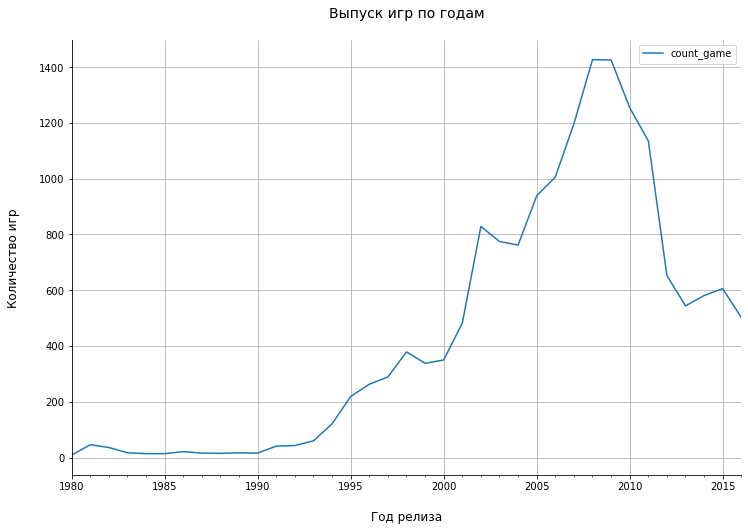

In [30]:
count_game.plot(x='year_of_release', y='count_game', grid=True, figsize=(12, 8))
plt.xlabel('\nГод релиза', fontsize=12)
plt.ylabel('Количество игр\n', fontsize=12)
plt.title('Выпуск игр по годам\n', fontsize=14)
sns.despine()

Вывод:
    
* Из графика следует, что количество выпускаемых игр начинает расти с 1990г.  
Поэтому данные за период с 1980 по 1990гг. не столь важны.
* Рост числа игр до 2010г. вероятно связан с увеличением числа персональных компьютеров
* С 2010г. можем наблюдать падение числа выпускаемых игр.  
Отток пользователей может быть обусловлен развитием мобильных приложений/игр.

**Посмотрим как менялись продажи по платформам**

In [31]:
platform_sale = df.groupby('platform', as_index=False)\
        .agg({'sum_sales': 'sum'})\
        .rename(columns={'sum_sales': 'platform_sale'})\
        .sort_values('platform_sale', ascending=False)
# или
# df.pivot_table(index='platform', values='sum_sales', aggfunc='sum')\
# .sort_values('sum_sales', ascending=False)

platform_sale.head()

platform  platform_sale
16      PS2        1255.77
28     X360         971.42
17      PS3         939.65
26      Wii         907.51
4        DS         806.12

Выберем платформы с наибольшими суммарными продажами

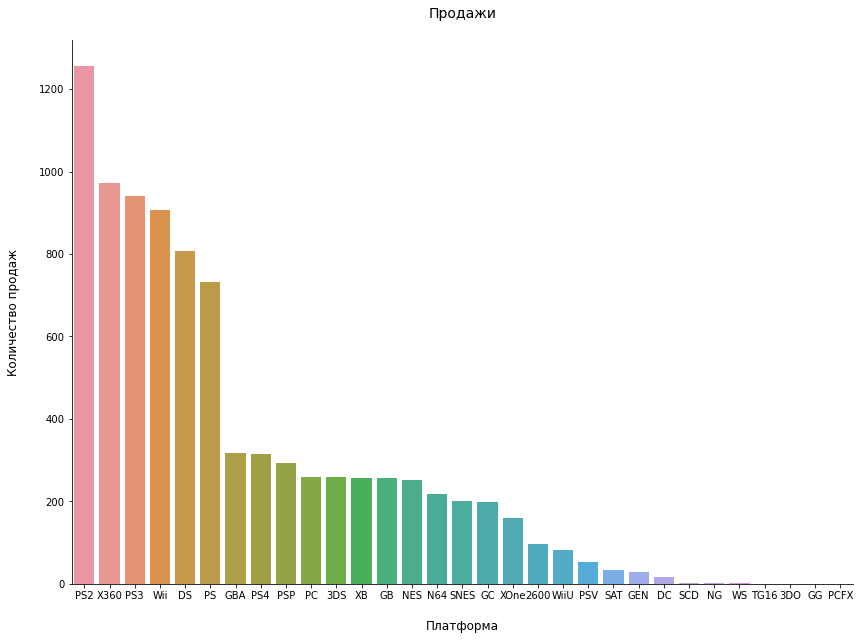

In [32]:
plt.figure(figsize=(14, 10))
sns.barplot(data=platform_sale, x='platform', y='platform_sale')
plt.xlabel('\nПлатформа', fontsize=12)
plt.ylabel('Количество продаж\n', fontsize=12)
plt.title('Продажи\n', fontsize=14)
sns.despine()

_Шестерка самых популярных платформ_

In [33]:
platform_top = platform_sale.head(6).reset_index(drop=True)
platform_top

platform  platform_sale
0      PS2        1255.77
1     X360         971.42
2      PS3         939.65
3      Wii         907.51
4       DS         806.12
5       PS         730.86

In [34]:
# или
# platform_sale = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum')\
#                     .rename(columns={'sum_sales': 'platform_sale'})\
#                     .sort_values('platform_sale', ascending=False)\
#                     .reset_index()
                    
# platform_sale.head(6)

In [35]:
platform_sales_year = df.groupby(['platform', 'year_of_release'], as_index=False)\
        .agg({'sum_sales': 'sum'})\
        .rename(columns={'sum_sales': 'platform_sale'})\
        .sort_values('platform_sale', ascending=False)\
        .reset_index(drop=True)
        
platform_sales_year.head()

platform year_of_release  platform_sale
0      PS2      2004-01-01         211.81
1      Wii      2009-01-01         206.97
2      PS2      2002-01-01         205.38
3      PS2      2003-01-01         184.31
4      Wii      2008-01-01         171.32

In [36]:
# отберем из platform_sales_year те значения платформ которые встречаются в platform_top

platform_sales_year_top = platform_sales_year.query('platform in @platform_top.platform and year_of_release > 2003')\
                        .reset_index(drop=True)
platform_sales_year_top.head()

platform year_of_release  platform_sale
0      PS2      2004-01-01         211.81
1      Wii      2009-01-01         206.97
2      Wii      2008-01-01         171.32
3     X360      2010-01-01         170.03
4      PS2      2005-01-01         160.66

**Построим распределение по годам**

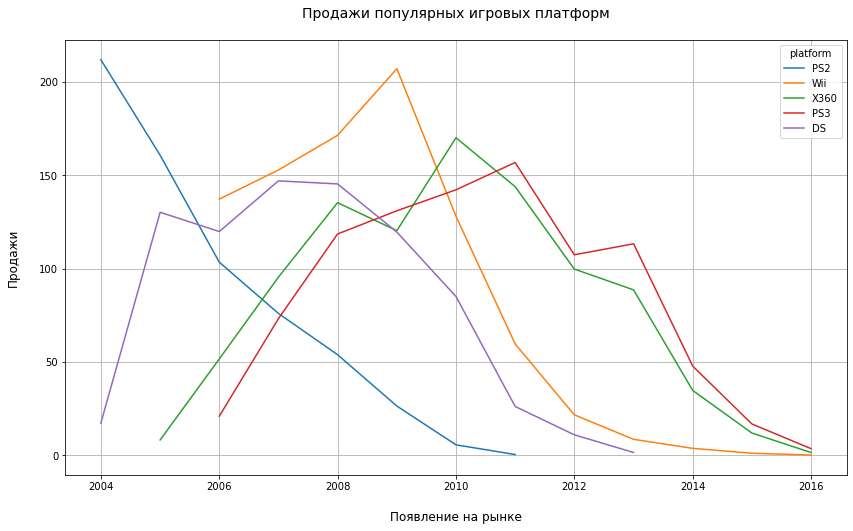

In [37]:
plt.figure(figsize=(14,8))
plt.grid()

sns.lineplot(data=platform_sales_year_top, x='year_of_release', y='platform_sale', hue='platform')
plt.title('Продажи популярных игровых платформ\n', fontsize=14)
plt.xlabel('\nПоявление на рынке', fontsize=12)
plt.ylabel('Продажи\n', fontsize=12);
# sns.despine()

Вывод:
* _За какой характерный период появляются новые и исчезают старые платформы?_  
\- примерно десять лет

* _Данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году?_  
\- с 2014 года. Тем самым отсечем те платформы, продажи которых к 2014г. были на нуле.

* _Какие платформы лидируют по продажам, растут или падают?_  
\- Sony Play Station 2, Sony Play Station 3 и XBOX  
\- продажи WII резко взлетели и так же резко упали 

**Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам**

In [38]:
# platform_top_new = platform_top.query("platform == ['Wii', 'X360', 'PS3']")
# platform_top_new

In [39]:
# на основании полученных данных отберем новый список топовых платформ

platform_top_new = platform_sales_year.query('platform in @platform_top.platform and year_of_release > 2013')\
                        .groupby('platform', as_index=False) \
                        .agg({'platform_sale': 'sum'}) \
                        .reset_index(drop=True)
platform_top_new

platform  platform_sale
0      PS3          68.18
1      Wii           5.07
2     X360          48.22

Оставим в таблице данные только топовых платформ

In [40]:
df_top = df.query('platform in @platform_top_new.platform').reset_index(drop=True)
df_top.head()

name platform year_of_release     genre  na_sales  \
0                 Wii Sports      Wii      2006-01-01    Sports     41.36   
1             Mario Kart Wii      Wii      2008-01-01    Racing     15.68   
2          Wii Sports Resort      Wii      2009-01-01    Sports     15.61   
3                   Wii Play      Wii      2006-01-01      Misc     13.96   
4  New Super Mario Bros. Wii      Wii      2009-01-01  Platform     14.44   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  sum_sales  
0     28.96      3.77         8.45          76.0         8.0      E      82.54  
1     12.76      3.79         3.29          82.0         8.3      E      35.52  
2     10.93      3.28         2.95          80.0         8.0      E      32.77  
3      9.18      2.93         2.84          58.0         6.6      E      28.91  
4      6.94      4.70         2.24          87.0         8.4      E      28.32

In [41]:
# или
# df[df['platform'].isin(['PS2', 'Wii', 'X360', 'PS', 'PS3', 'DS'])]

In [42]:
df_top.shape

(3913, 12)

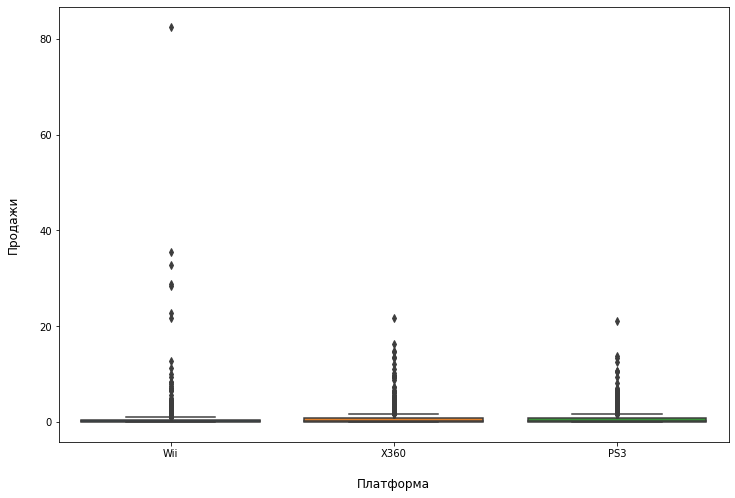

In [43]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=df_top, x='platform', y='sum_sales')

plt.xlabel('\nПлатформа', fontsize=12)
plt.ylabel('Продажи\n',fontsize=12);

Ничего не понятно, поэтому изменим масштаб по вертикальной оси

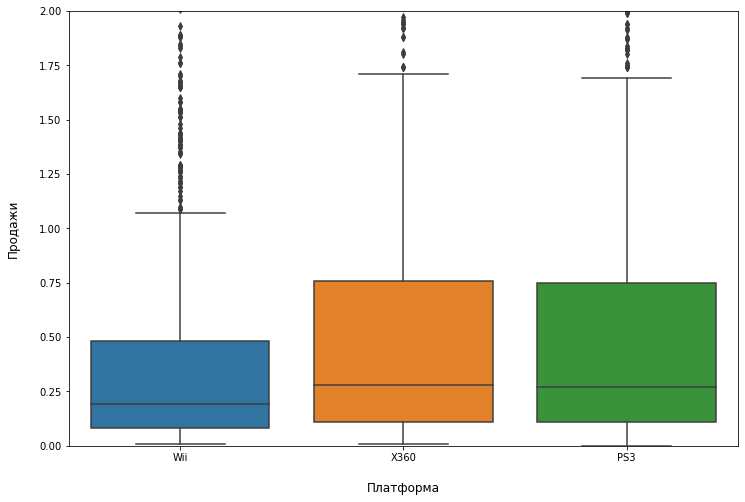

In [44]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=df_top, x='platform', y='sum_sales')

plt.xlabel('\nПлатформа', fontsize=12)
plt.ylabel('Продажи\n',fontsize=12)
plt.ylim(0, 2);

In [45]:
df_top.sum_sales.describe()

count    3913.000000
mean        0.720312
std         2.190259
min         0.000000
25%         0.100000
50%         0.250000
75%         0.660000
max        82.540000
Name: sum_sales, dtype: float64

Вывод:
* _Велика ли разница в продажах?_  
\- наблюдаем практически одинаковые продажи на платформах X360 и PS3, Wii - замыкает список

* _Велика ли разница в средних продажах на разных платформах?_  
\- практически отсутствует у X360 и PS3, средние продажи Wii - ниже

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.   
Сформулируем выводы и соотнесем их с продажами игр на других платформах.**

In [46]:
df_ps3 = df[df.platform == 'PS3'][['critic_score', 'user_score', 'sum_sales']] \
.sort_values(['critic_score', 'user_score'], ascending=False)
df_ps3.head(15)

critic_score  user_score  sum_sales
57            98.0         7.5      10.50
16            97.0         8.2      21.05
121           96.0         8.8       6.66
164           96.0         8.6       5.48
149           95.0         9.1       5.86
125           95.0         8.8       6.48
1052          95.0         8.4       1.69
150           95.0         6.8       5.82
147           94.0         8.7       5.99
1347          94.0         8.7       1.42
1060          94.0         8.5       1.69
1322          94.0         8.5       1.45
120           94.0         8.4       6.68
280           94.0         7.3       4.17
55            94.0         6.3      10.61

In [47]:
df_ps3.sum_sales.max()

21.05

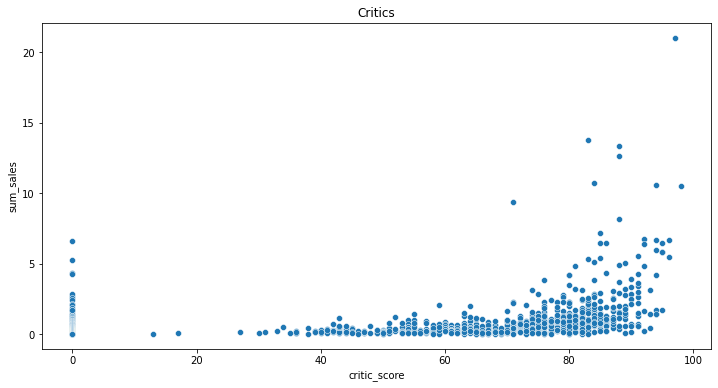

In [48]:
# диаграмма рассеяния оценок критиков

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_ps3, x='critic_score', y='sum_sales')
plt.title('Critics');

In [49]:
# коэф. корреляции между оценками критиков и продажами

df_ps3.critic_score.corr(df_ps3.sum_sales)

0.3550656759848728

Корреляция в 0,355 говорит о наличии связи, однако не слишком сильной.  
Выходит, увеличение оценки критиков влияет на продажи, но так бывает не всегда.

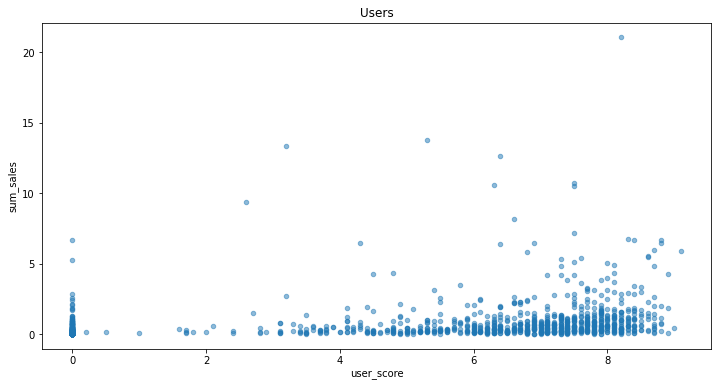

In [50]:
# диаграмма рассеяния оценок пользователей

df_ps3.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(12,6), title='Users', alpha=0.5);

In [51]:
# коэф. корреляции между оценками пользователей и продажами

df_ps3.user_score.corr(df_ps3.sum_sales)

0.274025459812262

Вывод:
* Оценка критиков в большей степени сказывается на продажах чем оценка пользователей

In [52]:
def platform_score(platform_name):    
    platform = df[df.platform == platform_name][['critic_score', 'user_score', 'sum_sales']] \
    .sort_values(['critic_score', 'user_score'], ascending=False)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    sns.scatterplot(data=platform, x='critic_score', y='sum_sales', ax=ax[0])
    sns.scatterplot(data=platform, x='user_score', y='sum_sales', ax=ax[1])
    ax[0].grid()
    ax[1].grid()
    
    fig.suptitle(platform_name, y=1, fontsize=16)
    
    corr_coef_critic = round(platform.critic_score.corr(platform.sum_sales), 6)
    corr_coef_user = round(platform.user_score.corr(platform.sum_sales), 6)   
    
    ax[0].set_title(f'Корреляция = {corr_coef_critic}\n')
    ax[1].set_title(f'Корреляция = {corr_coef_user}\n')
    
    sns.despine()

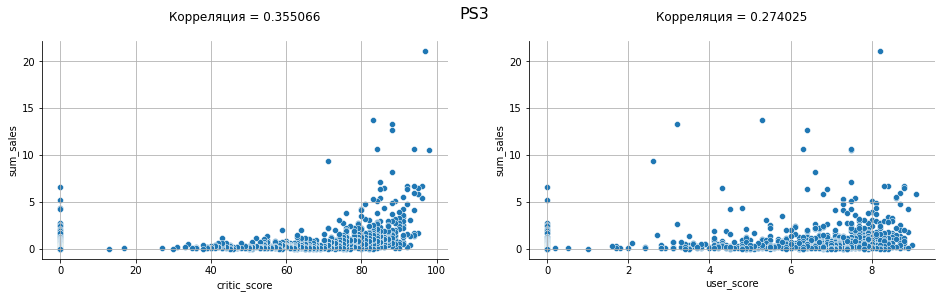

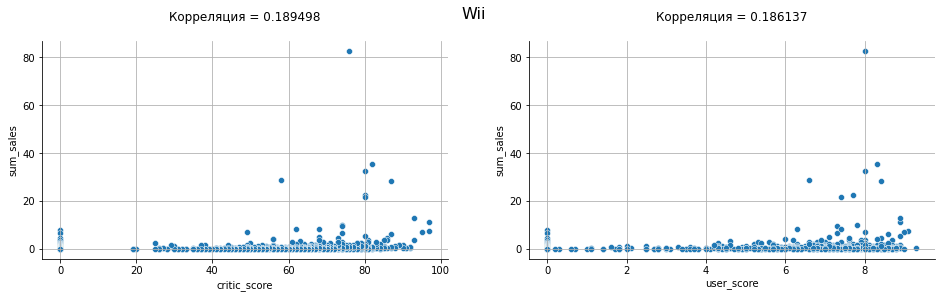

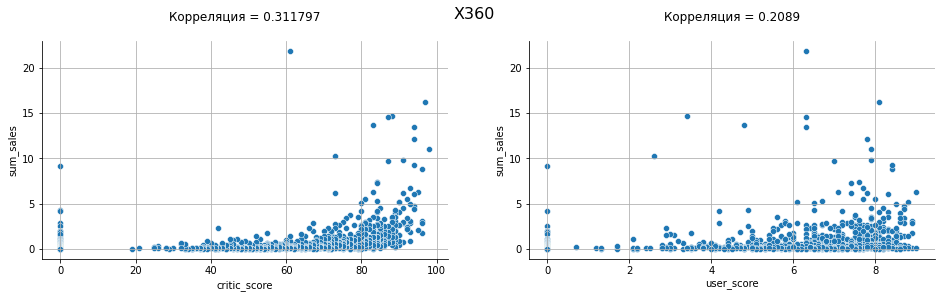

In [53]:
for platform_name in platform_top_new.platform:
    platform_score(platform_name)

Выводы:
     
* `X360`:   
\- корреляция между отзывами критиков и продажами слабая (`0.311797`)    
\- корреляция между отзывами пользователей и продажами слабая (`0.2089`)  
* `PS3`:   
\- корреляция между отзывами критиков и продажами слабая (`0.355066`)      
\- корреляция между отзывами пользователей и продажами слабая (`0.274025`)  
* `Wii`:   
\- корреляция между отзывами критиков и продажами очень слабая (`0.189488`)      
\- корреляция между отзывами пользователей и продажами очень слабая (`0.186137`) 

Можно заметить, что практически во всех случаях корреляция между отзывами критиков и продажами  
выше. Из этого можно заключить, что для покупателей имеет большее значение оценка критиов, нежели  
других пользователей.

**Посмотрим на общее распределение игр по жанрам.\
Что можно сказать о самых прибыльных жанрах?\
Выделяются ли жанры с высокими и низкими продажами?**

In [54]:
# Вычислим сумму продаж по каждому жанру и отсортируем по убыванию

df_genre = df.groupby('genre', as_index=False).agg({'sum_sales': 'sum'})\
            .sort_values('sum_sales', ascending=False)\
            .reset_index(drop=True)
df_genre

genre  sum_sales
0         Action    1744.17
1         Sports    1331.27
2        Shooter    1052.45
3   Role-Playing     934.56
4       Platform     827.77
5           Misc     802.51
6         Racing     728.67
7       Fighting     447.53
8     Simulation     389.97
9         Puzzle     242.57
10     Adventure     237.59
11      Strategy     174.23

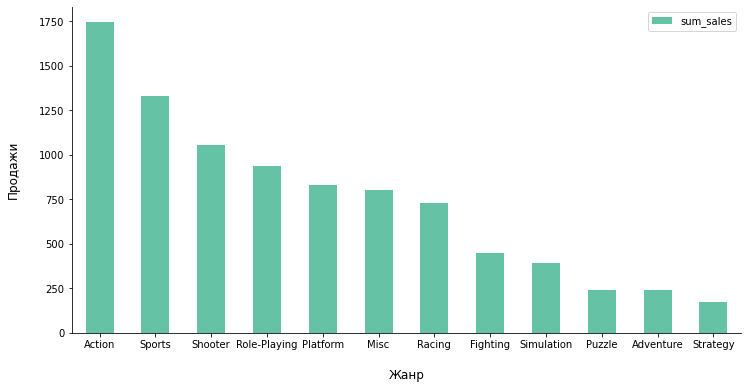

In [55]:
# посмотрим как это выглядит на графике

df_genre.plot(kind='bar', x='genre', figsize=(12, 6), rot='horizontal', colormap='Set2')
plt.xlabel('\nЖанр', fontsize=12)
plt.ylabel('Продажи\n', fontsize=12)
sns.despine();

Вывод:
* Лучше всего продаются игры жанра Action, Sports и Shooter
* Возможными причинами лидерства выше указанных жанров, могут быть:
    * динамичность, где не нужно особо дуумать, а требуется хорошая скорость реакции и координация глаз и рук

### 3. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
    - самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - самые популярные жанры (топ-5). Поясните разницу.
    - влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Регион North America**

In [56]:
# топ 5 платформ:

df_platform_NA = df.groupby('platform', as_index=False) \
                .agg({'na_sales': 'sum'}) \
                .sort_values('na_sales', ascending=False).reset_index(drop=True) \
                .head(5)
df_platform_NA

platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40

In [57]:
# топ 5 жанров:

df_genre_NA = df.groupby('genre', as_index=False) \
                .agg({'na_sales': 'sum'}) \
                .sort_values('na_sales', ascending=False).reset_index(drop=True) \
                .head(5)
df_genre_NA

genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27

In [58]:
# топ 5 рейтингов:

df_rating_NA = df.query('"no_rating" not in rating') \
                .groupby('rating', as_index=False) \
                .agg({'na_sales': 'sum'}) \
                .sort_values('na_sales', ascending=False).reset_index(drop=True) \
                .head(5)
df_rating_NA

rating  na_sales
0      E   1292.99
1      T    759.75
2      M    748.48
3   E10+    353.32
4    K-A      2.56

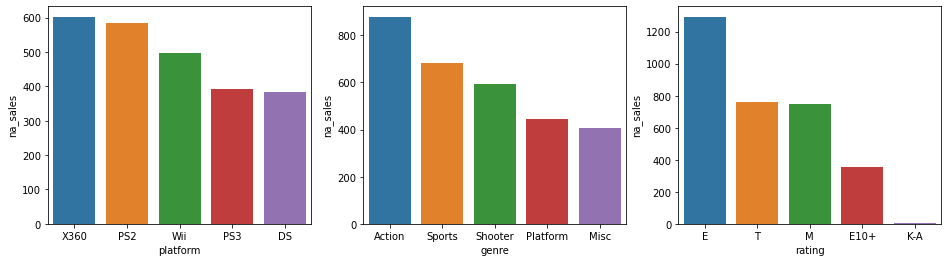

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
sns.barplot(data=df_platform_NA, x='platform', y='na_sales', ax=ax[0])
sns.barplot(data=df_genre_NA, x='genre', y='na_sales', ax=ax[1])
sns.barplot(data=df_rating_NA, x='rating', y='na_sales', ax=ax[2]);

Вывод:
* Самые популярные платформы в регионе North America это: X360, PS2, WII, PS3, DS    
* Топ 5 жанров в регионе North America : Action, Sports, Shooter, Platform, Misc  
* По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "для подростков, от 13 и старше", на третьем месте игры с рейтингом "для взрослых, от 17 и выше", и на четвертом игры с рейтингом "для всех от 10 лет и старше"

**Регион European Union**

In [60]:
df_platform_EU = df.groupby('platform', as_index=False) \
                .agg({'eu_sales': 'sum'}) \
                .sort_values('eu_sales', ascending=False).reset_index(drop=True) \
                .head(5)
df_platform_EU

platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61

In [61]:
df_genre_EU = df.groupby('genre', as_index=False) \
                .agg({'eu_sales': 'sum'}) \
                .sort_values('eu_sales', ascending=False).reset_index(drop=True) \
                .head(5)
df_genre_EU

genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74

In [62]:
df_rating_EU = df.query('"no_rating" not in rating') \
                .groupby('rating', as_index=False) \
                .agg({'eu_sales': 'sum'}) \
                .sort_values('eu_sales', ascending=False).reset_index(drop=True) \
                .head(5)
df_rating_EU

rating  eu_sales
0      E    710.25
1      M    483.97
2      T    427.03
3   E10+    188.52
4     AO      0.61

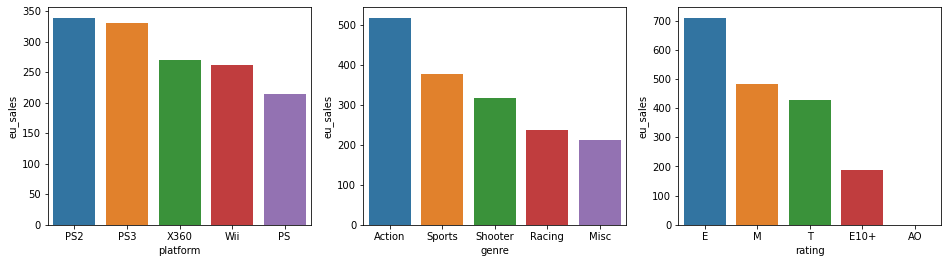

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
sns.barplot(data=df_platform_EU, x='platform', y='eu_sales', ax=ax[0])
sns.barplot(data=df_genre_EU, x='genre', y='eu_sales', ax=ax[1])
sns.barplot(data=df_rating_EU, x='rating', y='eu_sales', ax=ax[2]);

Вывод:
* Самые популярные платформы в регионе European Union это: PS2, PS3, X360, WII, PS    
* Топ 5 жанров в регионе European Union : Action, Sports, Shooter, Racing, Misc  
* По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "для взрослых, от 17 и выше", на третьем месте игры с рейтингом "для подростков, от 13 и старше", и на четвертом игры с рейтингом "для всех от 10 лет и старше"

**Регион Japanese**

In [64]:
df_platform_JP = df.groupby('platform', as_index=False) \
                .agg({'jp_sales': 'sum'}) \
                .sort_values('jp_sales', ascending=False).reset_index(drop=True) \
                .head(5)
df_platform_JP

platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67

In [65]:
df_genre_JP = df.groupby('genre', as_index=False) \
                .agg({'jp_sales': 'sum'}) \
                .sort_values('jp_sales', ascending=False).reset_index(drop=True) \
                .head(5)
df_genre_JP

genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11

In [66]:
df_rating_JP = df.query('"no_rating" not in rating') \
                .groupby('rating', as_index=False) \
                .agg({'jp_sales': 'sum'}) \
                .sort_values('jp_sales', ascending=False).reset_index(drop=True) \
                .head(5)
df_rating_JP

rating  jp_sales
0      E    198.11
1      T    151.40
2      M     64.24
3   E10+     40.20
4    K-A      1.46

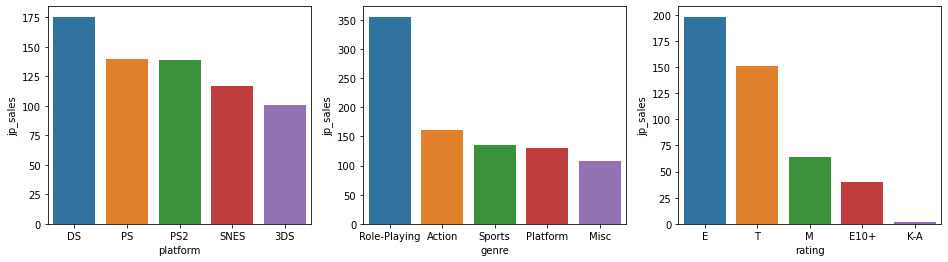

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
sns.barplot(data=df_platform_JP, x='platform', y='jp_sales', ax=ax[0])
sns.barplot(data=df_genre_JP, x='genre', y='jp_sales', ax=ax[1])
sns.barplot(data=df_rating_JP, x='rating', y='jp_sales', ax=ax[2]);

Вывод:
* Самые популярные платформы в регионе Japanese это: DS, PS, PS2, SNES, 3DS    
* Топ 5 жанров в регионе Japanese: Role-Playing, Action, Sports, Platform, Misc  
* По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "для подростков, от 13 и старше", на третьем месте игры с рейтингом "для взрослых, от 17 и выше", и на четвертом игры с рейтингом "для всех от 10 лет и старше"

Общий вывод:
* В регионах North America и European Union пользователи предпочитают как практически одни и те же платформы так и жанры
* В регионе Japanese налбюдаются отличия в предпочтениях как при выборе игровых платформ так и жанров
* В рейтингах по всем регионам преобладают "для всех", "для взрослых, от 17 и выше" и "для подростков, от 13 и старше"
* Возможно, наибольшее влияние на сходства и различия в выборе платформ и жанров, оказывает сходство и различие культур между регионами

### 4. Проведем исследование статистических показателей

\- как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах?  
\- посчитаем среднее количество, дисперсию и стандартное отклонение  
\- построим гистограммы.Опишием распределения  

In [68]:
# посчитаем средние оценки критиков и пользователей по жанрам

df_genre = df_top.groupby('genre', as_index=False).agg({'critic_score': 'mean', 'user_score': 'mean'})
df_genre.sort_values('critic_score').reset_index(drop=True)

genre  critic_score  user_score
0      Adventure     20.551220    2.281951
1           Misc     25.907895    2.449060
2         Puzzle     28.400000    2.150769
3       Strategy     34.116883    3.193506
4     Simulation     34.664557    3.503165
5         Sports     38.075253    3.728075
6         Racing     41.955017    4.107266
7         Action     44.719149    4.871489
8       Platform     46.625000    4.919167
9   Role-Playing     49.921397    5.318777
10       Shooter     51.573113    5.312264
11      Fighting     54.688525    5.565574

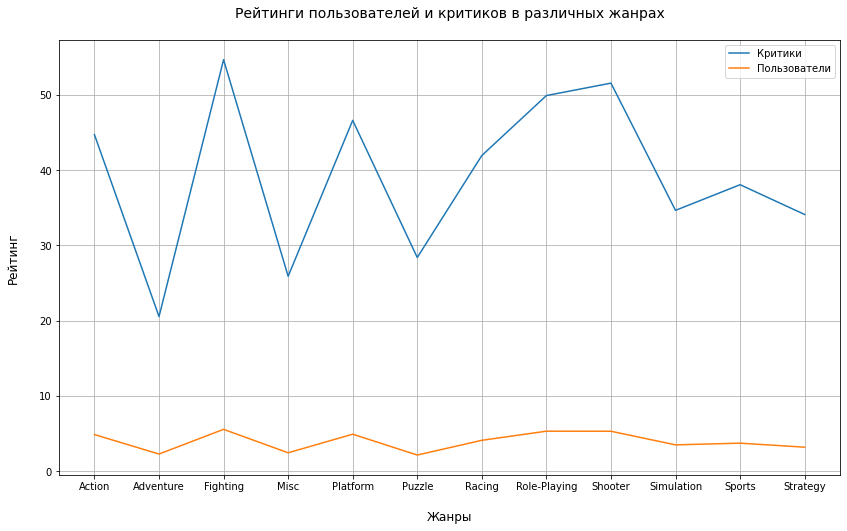

In [69]:
plt.figure(figsize=(14,8))
plt.grid()

sns.lineplot(data=df_genre, x='genre', y='critic_score', label='Критики')
sns.lineplot(data=df_genre, x='genre', y='user_score', label='Пользователи')
plt.title('Рейтинги пользователей и критиков в различных жанрах\n', fontsize=14)
plt.xlabel('\nЖанры', fontsize=12)
plt.ylabel('Рейтинг\n', fontsize=12);

In [70]:
# точки расхождения в оценках 

user_score_max = 0
for user_score in df_genre.sort_values('critic_score').user_score:
    if user_score > user_score_max:
        user_score_max = user_score
    else:
        print(user_score)

2.1507692307692308
5.3122641509433945


Вывод:
* В подавляющем большинстве случаев критики и пользователи сходятся во мнениях относительно оценки жанра

In [71]:
# оставим только реальные оценки, т.е. больше 0

df_critic = df_top.query('critic_score > 0')

In [72]:
# посчитаем среднее количество, дисперсию и стандартное отклонение для оценок критиков

for i in platform_top_new.platform:
    print('Дисперсия', i, ':', np.var(df_critic[df_critic['platform'] == i]['critic_score']))
    print('Стандартное отклонение', i, ':', np.std(df_critic[df_critic['platform'] == i]['critic_score']))
    print('Среднее', i, ':', np.mean(df_critic[df_critic['platform'] == i]['critic_score']))
    print()

Дисперсия PS3 : 196.96800118976802
Стандартное отклонение PS3 : 14.034528890909307
Среднее PS3 : 70.3829268292683

Дисперсия Wii : 220.95190590985473
Стандартное отклонение Wii : 14.864451080004763
Среднее Wii : 62.82393162393162

Дисперсия X360 : 225.2516387464008
Стандартное отклонение X360 : 15.008385614262474
Среднее X360 : 68.61681222707423



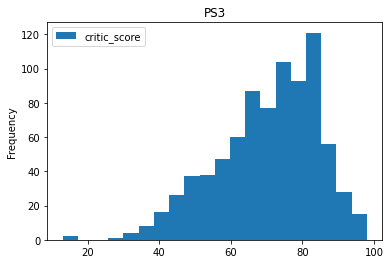

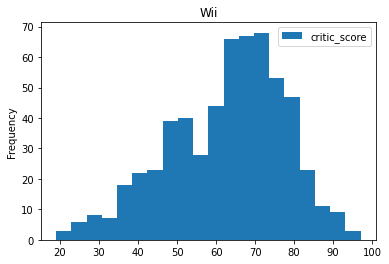

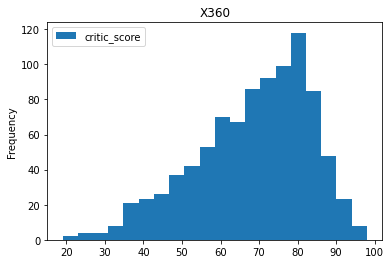

In [73]:
# построим гистограммы на основе отзывов критиков

for platform_name, data in df_critic.groupby('platform'):
    data.plot(kind='hist', title=platform_name, y='critic_score', bins=20)

Вывод:
* Наблюдаются гистограммы с ассиметричными распределениями (гистограммы с отрицательной/левосторонней ассиметрией). Среднее значение гистограммы располагается левее середины разбега данных, происходит резкое уменьшение частоты (высоты столбиков) с одного края.

In [74]:
# оставим только реальные оценки, т.е. больше 0

df_user = df_top.query('user_score > 0')

In [75]:
# посчитаем среднее количество, дисперсию и стандартное отклонение для оценок пользователей

for i in platform_top_new.platform:
    print('Дисперсия', i, ':', np.var(df_user[df_user['platform'] == i]['user_score']))
    print('Стандартное отклонение', i, ':', np.std(df_user[df_user['platform'] == i]['user_score']))
    print('Среднее', i, ':', np.mean(df_user[df_user['platform'] == i]['user_score']))
    print()

Дисперсия PS3 : 2.1327377071986597
Стандартное отклонение PS3 : 1.4603895737777162
Среднее PS3 : 6.726567844925886

Дисперсия Wii : 3.0197678252551015
Стандартное отклонение Wii : 1.7377479176379702
Среднее Wii : 6.74267857142857

Дисперсия X360 : 2.07528808687937
Стандартное отклонение X360 : 1.44058602203387
Среднее X360 : 6.683540372670819



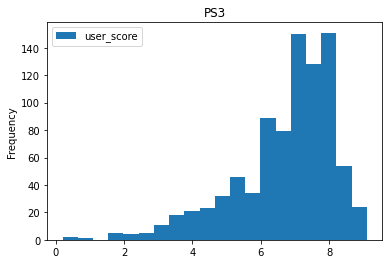

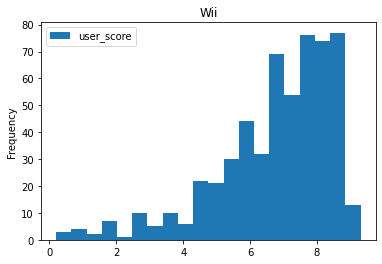

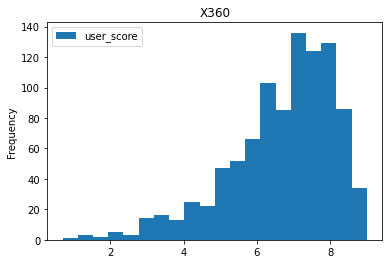

In [76]:
# построим гистограммы на основе отзывов пользователей

for platform_name, data in df_user.groupby('platform'):
    data.plot(kind='hist', title=platform_name, y='user_score', bins=20)

Вывод:
* Наблюдаются гистограммы с ассиметричными распределениями (гистограммы с отрицательной/левосторонней ассиметрией). Среднее значение гистограммы располагается левее середины разбега данных, происходит резкое уменьшение частоты (высоты столбиков) с одного края, напоминая распределение с обрывом

### 5. Проверим гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Зададим самостоятельно пороговое значение alpha.

Поясним:
    - как сформулировали нулевую и альтернативную гипотезы;
    - какой критерий применили для проверки гипотез и почему.

In [77]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Гипотезы:
    - нулевая гепотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
    - альтернативная гепотеза: средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [78]:
df_one = df.query('platform == "XOne"').user_score
df_one

99       0.0
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    0.0
16660    6.7
16672    0.0
Name: user_score, Length: 247, dtype: float64

In [79]:
# средний пользовательский рейтинг платформы XOne

df_one_mean = df_one.mean()
df_one_mean

4.805263157894736

In [80]:
df_ps = df.query('platform == "PS"').user_score
df_ps

52       8.7
65       9.2
67       9.0
88       8.6
95       0.0
        ... 
16341    0.0
16468    0.0
16607    0.0
16624    0.0
16666    0.0
Name: user_score, Length: 1197, dtype: float64

In [81]:
# средний пользовательский рейтинг платформы PS

df_ps_mean = df_ps.mean()
df_ps_mean

1.064494569757727

In [82]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод
# scipy.stats.ttest_ind

alpha = 0.05 

results = st.ttest_ind(df_one, df_ps)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 1.244977312507842e-72
Отвергаем нулевую гипотезу


Вывод: 
* Значение p-value гараздо меньше критического уровня значимости alpha. Следовательно можем отклонить нулевую гипотезу

Гипотезы:
    - нулевая гепотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые
    - альтернативная гепотеза: средние пользовательские рейтинги жанров Action и Sports отличаются

In [83]:
df_action = df.query('genre == "Action"').user_score
df_action

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16692    7.6
16694    0.0
16695    0.0
16699    0.0
16710    0.0
Name: user_score, Length: 3369, dtype: float64

In [84]:
# средний пользовательский рейтинг жанров Action

df_action_mean = df_action.mean()
df_action_mean

3.831671119026414

In [85]:
df_sports = df.query('genre == "Sports"').user_score
df_sports

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16676    0.0
16688    0.0
16693    0.0
16700    0.0
16711    0.0
Name: user_score, Length: 2348, dtype: float64

In [86]:
# средний пользовательский рейтинг жанров Action

df_sports_mean = df_sports.mean()
df_sports_mean

3.270102214650768

In [87]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

alpha = 0.05 

results = st.ttest_ind(df_action, df_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 1.1944013786844029e-08
Отвергаем нулевую гипотезу


Вывод:
* Значение p-value гараздо меньше критического уровня значимости alpha. Следовательно можем отклонить нулевую гипотезу

### Общий вывод

* Перед анализом провели предобработку данных.
* Выяснили, что аббревиатура tbd означают to be announced. Перевод простой — «будет объявлено дополнительно».  
Используется, если какая-то информация еще не определена или решение по вопросу не принято.  
* Определили, что для того чтобы исключить значимое искажение распределения по платформам в 2016 году следует рассматривать данные с 2014 года.
* Самыми популярными игровыми платформами оказались X360, PS3 и Wii.
* Выяснили, что оценки критиков и пользователей влияют на продажи, при этом в большей степени на продажах сказываются оценки критиков.
* Установили, что лучше всего продаются игры жанра Action.
* Составили портреты пользователей разных регионов продаж:  
    \- самые популярные платформы в регионе North America: X360, PS2, WII, PS3, DS. Топ 5 жанров: Action, Sports, Shooter, Platform, Misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех".   
    \- самые популярные платформы в регионе European Union: PS2, PS3, X360, WII, PS. Топ 5 жанров: Action, Sports, Shooter, Racing, Misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех".  
    \- самые популярные платформы в регионе Japanese: DS, PS, PS2, SNES, 3DS. Топ 5 жанров: Role-Playing, Action, Sports, Platform, Misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех".   
            
В регионах North America и European Union пользователи предпочитают как практически одни и те же платформы так и жанры.  
В регионе Japanese налбюдаются отличия в предпочтениях как при выборе игровых платформ так и жанров. Возможно сказывается влияние восточного менталитета.

* В независимости от региона, предпочтение отдается игрофой приставке Sony Playstation, жанру Action с рейтингом "для всех".
